## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error       # sempre importar o mse

import dtreeviz
from dtreeviz.trees import *
import graphviz

In [3]:
boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
X = boston.drop(columns = ['medv','b'], axis=1)
X.head()

#criando a variável explicativa

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [7]:
y = boston.medv.copy()
y.head()

#criando a vari´vel resposta

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873) 

# separando os dados em validação e teste

In [43]:
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_2.fit(X_train, y_train)

#treinando a árvore

DecisionTreeRegressor(max_depth=5)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [44]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train) 
path

#CCP para árvore de profundidade 5

{'ccp_alphas': array([ 0.        ,  0.04295906,  0.10639182,  0.12083687,  0.14187677,
         0.14451105,  0.34982715,  0.5025005 ,  0.54732197,  0.54866838,
         0.56597029,  0.66191267,  0.72922888,  0.74013542,  0.87670295,
         0.96651055,  1.55245502,  2.78056299,  3.0571052 ,  4.66113142,
         5.28170375, 17.06061075, 41.67185681]),
 'impurities': array([ 6.75264215,  6.79560121,  6.90199303,  7.0228299 ,  7.16470666,
         7.30921772,  7.65904487,  8.16154536,  8.70886734,  9.25753572,
         9.823506  , 10.48541868, 11.21464756, 11.95478297, 12.83148592,
        13.79799647, 15.35045149, 18.13101449, 21.18811969, 25.84925111,
        31.13095486, 48.19156561, 89.86342242])}

Text(0, 0.5, 'Impureza total das folhas')

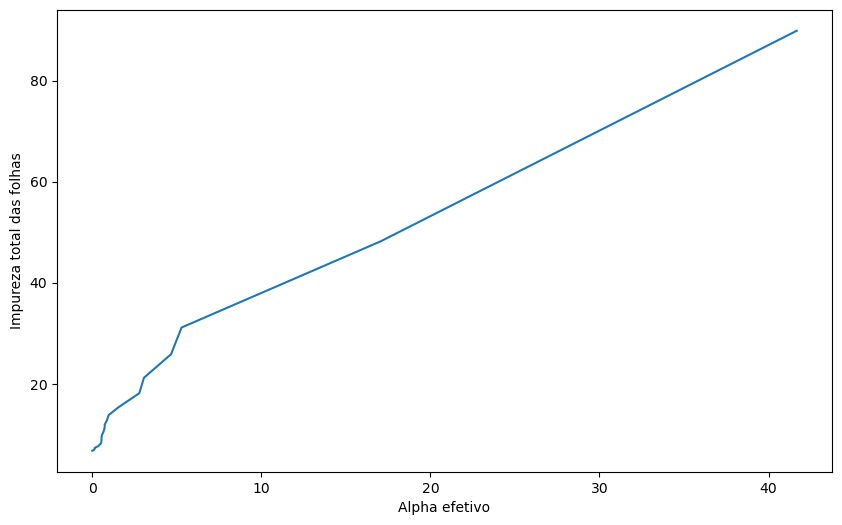

In [45]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [46]:
clfs = [] # treinando as árvores com seus resptivos alphas e guardando na lista clfs

for ccp_alpha in ccp_alphas2:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

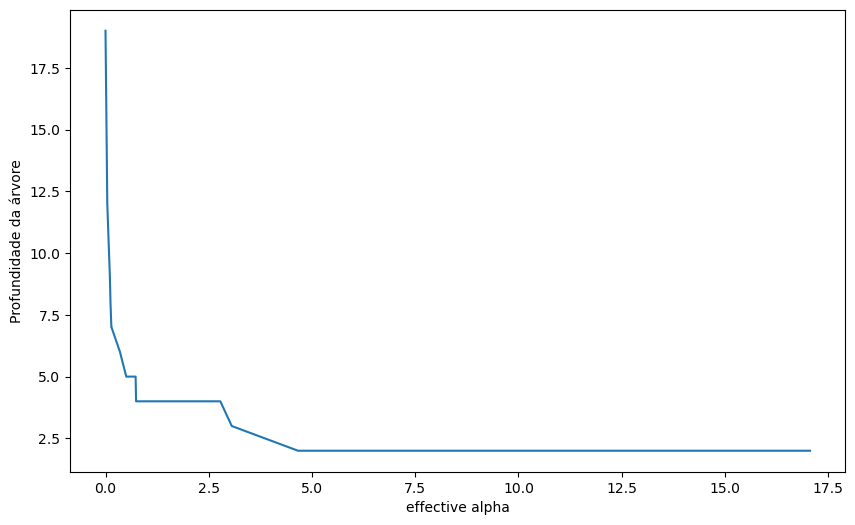

In [48]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [52]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

In [114]:
df2 = pd.DataFrame(zip(train_scores, test_scores), columns = ["train", "test"])
df2

# calculando o MSE para cada árvore da lista de clssificação

,train,test
0,0.000000,13.866457
1,1.547237,13.596144
2,3.652409,13.826694
3,4.208506,13.233040
4,4.584091,13.370794
5,4.725967,13.235894
6,6.458320,12.560571
7,8.161545,13.472482
8,8.161545,13.472482
9,9.257536,13.281829


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

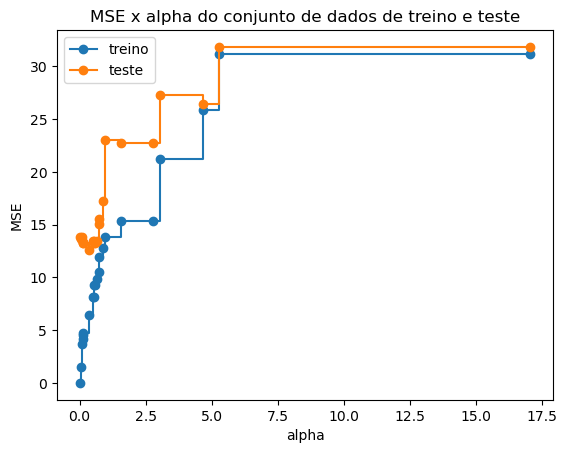

<Figure size 1000x1000 with 0 Axes>

In [61]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

#plotando o gráfico com MSE e alpha

In [119]:
df= df2.assign(alpha = path.ccp_alphas)
df

# adicionei a coluna alpha

,train,test,alpha
0,0.000000,13.866457,0.000000
1,1.547237,13.596144,0.042959
2,3.652409,13.826694,0.106392
3,4.208506,13.233040,0.120837
4,4.584091,13.370794,0.141877
5,4.725967,13.235894,0.144511
6,6.458320,12.560571,0.349827
7,8.161545,13.472482,0.502500
8,8.161545,13.472482,0.547322
9,9.257536,13.281829,0.548668


In [109]:
df.loc[df.test.min()]

KeyError: 12.56057098370185

Ao que tudo indica, quando o valor mínimo de mse de teste é 12.56057 o valor de alpha é 0.349827
Valor mínimo de mse de treinamento é 0 e o alpha também é 0

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [120]:
tree1 = DecisionTreeRegressor(ccp_alpha=0.349827) # aplicando o menor alpha na árvore

tree1.fit(X_train, y_train)

# treinando a árvore com o alpha do menor valor de MSE

DecisionTreeRegressor(ccp_alpha=0.349827)

In [121]:
r2 = tree1.score(X_train, y_train)

template = "O R-quadrado da árvore com profundidade={0} é: {1:.2f}"

print(template.format(tree1.get_depth(),mse2).replace(".",","))

#calculando o R-quadrado da árvore com o alpha escolhido

O R-quadrado da árvore com profundidade=6 é: 0,92


### 7. Visualize esta árvore.

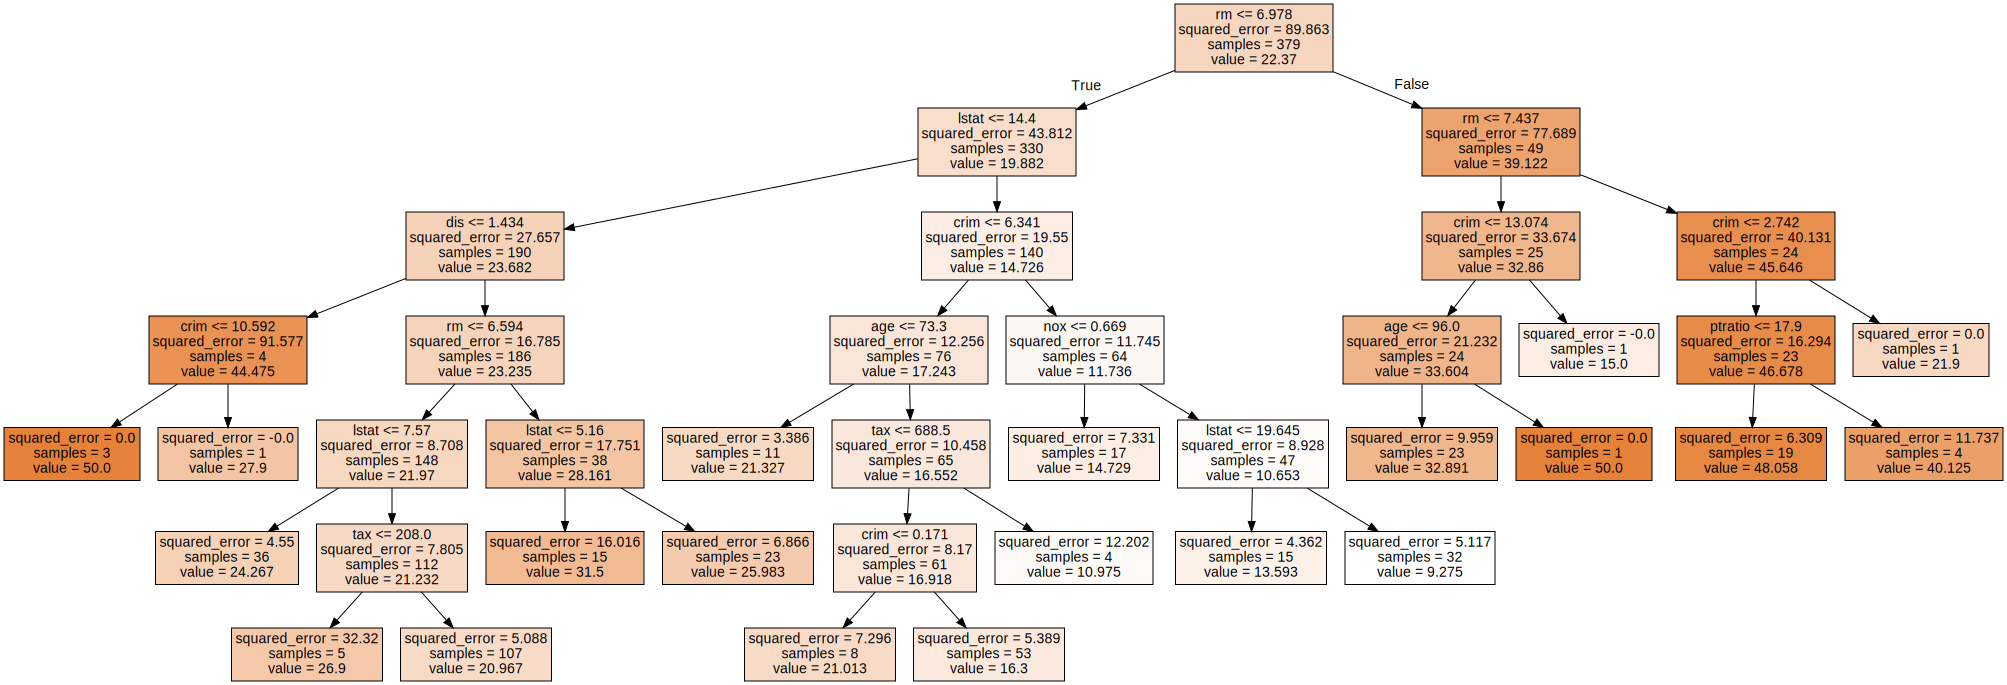

In [122]:
dot_data = tree.export_graphviz(tree1, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

#visualização da árvore